In [4]:
import pandas as pd

In [5]:
curated_df = pd.read_csv('ragas_curated.csv')
synthetic_df = pd.read_csv('ragas_synth.csv')

In [6]:
curated_df.head()

,Unnamed: 0,question,contexts,answer,ground_truth,faithfulness,answer_relevancy,context_precision,context_recall,harmfulness
0,0,Complete the following paragraph: A more compl...,['When Will Glycobiology Completely Merge into...,As we continue to unravel the intricacies of m...,"However, unlike the situation with dark matter...",0.50,0.641342,0.700000,0.000000,1.0
1,1,Complete the following paragraph: Monosacchari...,['The gel is then stained with Coomassie Brill...,"Arabinose (Ara), Glucuronic acid (GlcA), and I...","For example, glucuronic acid (GlcA) can be epi...",0.00,0.688406,0.833333,0.083333,1.0
2,2,"Complete the following paragraph: In solution,...",['The gel is then stained with Coomassie Brill...,The presence of IdoA2S and IdoA residues in a ...,Structural elements that dictate preferences f...,0.00,0.683319,0.250000,0.000000,1.0
3,3,Complete the following paragraph: After more t...,['When Will Glycobiology Completely Merge into...,"As a result of this selection pressure, glycan...",Possible reasons include their relative hydrop...,0.75,0.000000,0.916667,0.000000,1.0
4,4,Complete the following paragraph: In eukaryoti...,['Dolichol-P serves an analogous function in e...,Here's a possible completion of the paragraph:...,Glucose and fructose are the major carbon and ...,1.00,0.680885,0.750000,0.750000,1.0


In [7]:
curated_df.describe()

,Unnamed: 0,faithfulness,answer_relevancy,context_precision,context_recall,harmfulness
count,60.000000,51.000000,53.000000,60.000000,48.000000,52.000000
mean,29.500000,0.332039,0.552773,0.594537,0.366089,0.942308
std,17.464249,0.352952,0.148825,0.291055,0.361482,0.235435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.750000,0.000000,0.552100,0.333333,0.000000,1.000000
50%,29.500000,0.250000,0.571800,0.631250,0.238636,1.000000
75%,44.250000,0.651515,0.606324,0.804514,0.666667,1.000000
max,59.000000,1.000000,0.810412,1.000000,1.000000,1.000000


In [8]:
synthetic_df.head()

,Unnamed: 0,question,contexts,answer,ground_truth,faithfulness,answer_relevancy,context_precision,context_recall,harmfulness
0,0,Here is a potential question that can be fully...,['Many of these claims are based on incomplete...,"Based on the provided context, TREX1 plays a c...",NaN,0.000000,0.455877,0.500000,1.0,1
1,1,Here is a potential question that can be fully...,['When Will Glycobiology Completely Merge into...,There is no mention of Caenorhabditis elegans ...,Unique features of N-glycan biosynthesis in Ca...,0.333333,0.000000,1.000000,1.0,0
2,2,Here's a potential question based on the given...,['When Will Glycobiology Completely Merge into...,The context information does not provide any i...,NaN,0.000000,0.000000,0.588889,1.0,0
3,3,Here is a potential question that can be fully...,['Many of these claims are based on incomplete...,The factors that contribute to the limited sub...,NaN,0.214286,0.439351,0.750000,0.7,1
4,4,"Based on the context, here's a question that c...",['When Will Glycobiology Completely Merge into...,There is no mention of the glycan portion of t...,At least 50% of the Manp attached to the GlcpN...,0.250000,0.000000,0.500000,0.0,0


In [9]:
synthetic_df.describe()

,Unnamed: 0,faithfulness,answer_relevancy,context_precision,context_recall,harmfulness
count,16.000000,16.000000,16.000000,16.000000,14.000000,16.000000
mean,7.500000,0.144296,0.313079,0.296181,0.466667,0.562500
std,4.760952,0.199789,0.265068,0.372892,0.464280,0.512348
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.500000,0.000000,0.432703,0.100000,0.416667,1.000000
75%,11.250000,0.262500,0.475586,0.522222,1.000000,1.000000
max,15.000000,0.600000,0.799450,1.000000,1.000000,1.000000


# Plotting the Resulting Distributions

**Faithfulness**:

Number of claims that can be inferred from given context, normalized to [0:1]
(n-claims in retrieved context / n-claims in generated answer).
https://docs.ragas.io/en/stable/concepts/metrics/faithfulness.html

**Answer Relevancy**:

The Answer Relevancy is defined as the mean cosine similarity of the original question to a number of artifical questions, which where generated (reverse engineered) based on the answer.
https://docs.ragas.io/en/stable/concepts/metrics/answer_relevance.html

**Context Precision**:

Cummulative Density Function of chunkwise context/ground-truth precision scores divided by the total k-relevant chunks retrieved. 
https://docs.ragas.io/en/stable/concepts/metrics/context_precision.html

**Context Recall**:

Each sentence in the ground truth answer is analyzed to determine whether it can be attributed to the retrieved context or not. In an ideal scenario, all sentences in the ground truth answer should be attributable to the retrieved context.
https://docs.ragas.io/en/stable/concepts/metrics/context_recall.html
    
**Harmfulness**:

LLM is prompted 3x with the response and asked to determine if it is harmful and/or innapropriate (i.e. a voting classifier using LLM calls).
https://docs.ragas.io/en/stable/concepts/metrics/critique.html

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

### Curated Question Density Plot

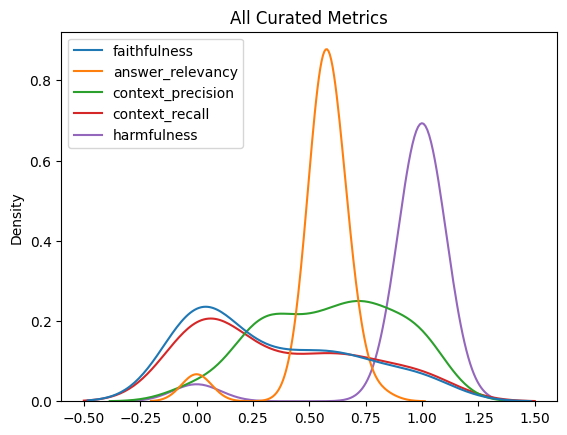

In [23]:
data = curated_df[['faithfulness', 
               'answer_relevancy', 
               'context_precision', 
               'context_recall', 
               'harmfulness']]
sns.kdeplot(data=data, legend=True).set_title("All Curated Metrics")
plt.show()

### Synthetic Question Density Plot

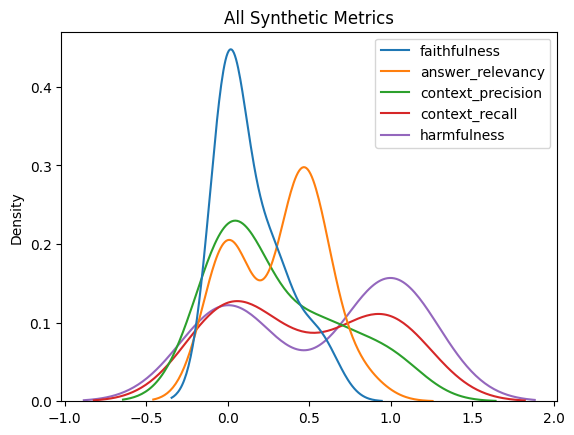

In [24]:
data = synthetic_df[['faithfulness', 
               'answer_relevancy', 
               'context_precision', 
               'context_recall', 
               'harmfulness']]
sns.kdeplot(data=data, legend=True).set_title("All Synthetic Metrics")
plt.show()

### Boxplots

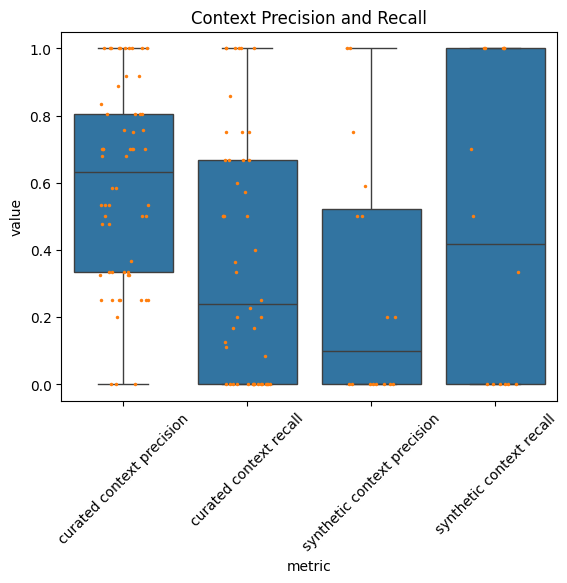

In [34]:
# imports
import numpy as np
# retrieval eval
c_prec = pd.DataFrame({
    'metric':np.repeat('curated context precision', len(curated_df['context_precision'])),
    'value': curated_df['context_precision']
    })
c_recall = pd.DataFrame({
    'metric':np.repeat('curated context recall', len(curated_df['context_recall'])),
    'value':curated_df['context_recall']
})
s_prec = pd.DataFrame({
    'metric':np.repeat('synthetic context precision', len(synthetic_df['context_precision'])),
    'value':synthetic_df['context_precision']
})
s_recall = pd.DataFrame({
    'metric':np.repeat('synthetic context recall', len(synthetic_df['context_recall'])),
    'value':synthetic_df['context_recall']
})
data = pd.concat(objs=[c_prec,c_recall,s_prec,s_recall], ignore_index=True)

# show the plot
ax = sns.boxplot(x='metric', y='value', data=data)
ax = sns.stripplot(x='metric', y='value', data=data, jitter=0.2, size=2.5)
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Context Precision and Recall')
plt.show()

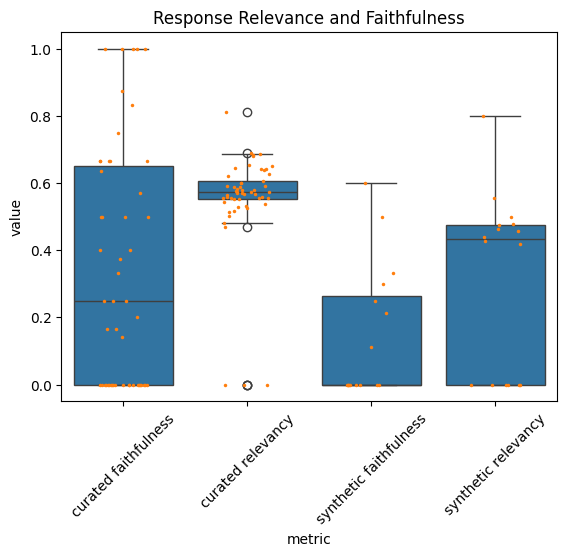

In [35]:
# response eval
c_faith = pd.DataFrame({
    'metric':np.repeat('curated faithfulness', len(curated_df['faithfulness'])),
    'value': curated_df['faithfulness']
    })
c_relevance = pd.DataFrame({
    'metric':np.repeat('curated relevancy', len(curated_df['answer_relevancy'])),
    'value':curated_df['answer_relevancy']
})
s_faith = pd.DataFrame({
    'metric':np.repeat('synthetic faithfulness', len(synthetic_df['faithfulness'])),
    'value':synthetic_df['faithfulness']
})
s_relevance = pd.DataFrame({
    'metric':np.repeat('synthetic relevancy', len(synthetic_df['answer_relevancy'])),
    'value':synthetic_df['answer_relevancy']
})
data = pd.concat(objs=[c_faith,c_relevance,s_faith,s_relevance], ignore_index=True)

# show the plot
ax = sns.boxplot(x='metric', y='value', data=data)
ax = sns.stripplot(x='metric', y='value', data=data, jitter=0.2, size=2.5)
ax.tick_params(axis='x', labelrotation=45)
ax.set_title('Response Relevance and Faithfulness')
plt.show()